In [1]:
%pylab inline
import cPickle
from helper import PeriodicAccumulator, BooleanAccumulator
from itertools import product

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get(vary, h1, l_f, delta, i):
    return cPickle.load(open('files/bi_poo_vary_vary_{0}_h1_{1}_l_f_{2}_delta_{3}_i_{4}.p'.format(vary, h1, l_f, delta, i),'rb'))


vary_s = [str(a) for a in ['alpha', 'beta', 'r_max']]
h1_s = [str(a) for a in [False, True]]
l_f_s = [str(a) for a in [1.0, 10.0]]
delta_s = [str(a) for a in array([-60., -58., -56., -54., -52., -50., -48., -46., -44., -42., -40.,
       -38., -36., -34., -32., -30., -28., -26., -24., -22., -20., -18.,
       -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,
         6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,  26.,
        28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  60.])]
i_s = [str(a) for a in [0, 1, 2, 3, 4]]


params = list(product(vary_s, h1_s, l_f_s, delta_s, i_s))

data = {tup:get(*tup) for tup in params}

In [4]:
len(params)

3660

In [5]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import clear_output, display, HTML

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [6]:
def show_plot(vary, h1, l_f):
    figure(figsize=(12,5))
    for i in i_s:
        dws = zeros(len(delta_s))
        for idx, delta in enumerate(delta_s):
            p = (vary, h1, l_f, delta, i)
            dws[idx] = data[p][0][0].res['weights'][-1]/data[p][0][0].res['weights'][0]
        plot(delta_s, dws)
    legend([str(a) for a in range(11)], loc=0)


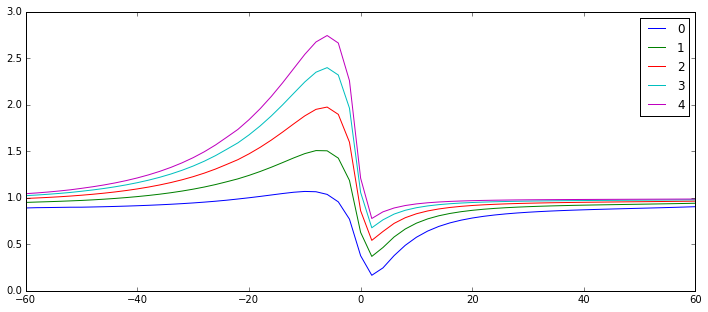

In [7]:
ts = data[params[0]][0][0].t
i = interact(show_plot,
key=widgets.ToggleButtons(description='key',options=['dendr_pred','weights','weight_updates', 'PIVs', 'y','h']),
t_min=(0,int(np.round(ts[-1]))),
t_max=(0,int(np.round(ts[-1]))),
vary=widgets.ToggleButtons(description='vary',options=vary_s),
h1=widgets.ToggleButtons(description='h1',options=h1_s),
l_f=widgets.ToggleButtons(description='l_f',options=l_f_s),
delta=widgets.ToggleButtons(description='delta',options=delta_s),
i=widgets.ToggleButtons(description='i',options=i_s),
y_c=widgets.ToggleButtons(description='y_c',options=[str(a) for a in range(5)]))


In [8]:
bi_poo = loadtxt('.././experimental_data/bi_poo_stdp_points.csv',delimiter=',')
print bi_poo

[[   6.10877753   99.30467939]
 [   2.25490956   87.93651286]
 [   7.62279709   92.34217338]
 [   7.85715393   82.22266999]
 [  -1.61383821   74.67117194]
 [   8.0815909    70.83838368]
 [   5.76654215   55.66966846]
 [   7.00404545   53.45133841]
 [   7.59179751   48.38972674]
 [  17.26986686   42.34356836]
 [  16.89167196   34.12371933]
 [   6.83788769   32.26622441]
 [   7.77903498   32.26250446]
 [   4.93079343   29.11170699]
 [   6.12117736   20.88565804]
 [   7.99851202   20.24582668]
 [  35.59061953   18.23953377]
 [  26.46806268   15.11353597]
 [  77.88272858   10.48343847]
 [  96.02368368    3.45521335]
 [  86.8738472    -3.14893749]
 [  57.95495761  -10.30736085]
 [  27.31745121    3.41057396]
 [   7.85715393    2.22266999]
 [  -2.64798425   22.81755196]
 [  -3.13529767    0.68509075]
 [ -13.84131314   -4.33188152]
 [  -3.8668878   -12.59265   ]
 [  -3.57301176  -15.12345583]
 [  -4.24260272  -20.4963033 ]
 [  -7.39712014  -22.69727359]
 [  -4.65551715  -33.14289257]
 [  -3.7

In [9]:
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

In [10]:
def plot_bi_poo():
    scatter(-bi_poo[:,0],bi_poo[:,1],lw=0,c='#984ea3',s=40,zorder=-100)
    plot([-100,100],[0,0],'k--')
    plot([0,0],[-60,120],'k--')
    xlim([-100,100])
    ylim([-60,120])

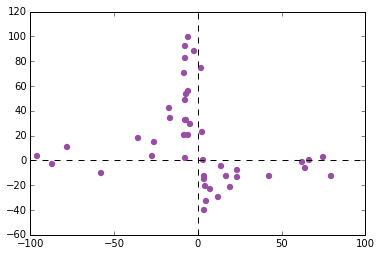

In [11]:
plot_bi_poo()

In [12]:
def plot_fit(h1, l_f):
    dws = zeros(len(delta_s))
    for idx, delta in enumerate(delta_s):
        p = ("alpha", str(h1), l_f, delta, '2')
        dws[idx] = data[p][0][0].res['weights'][-1]/data[p][0][0].res['weights'][0]
    plot([float(a) for a in delta_s], 100*dws-100)

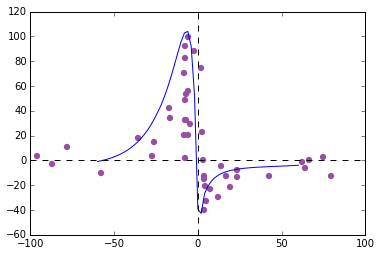

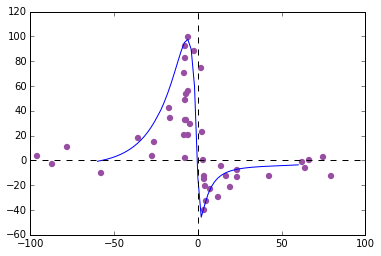

In [13]:
plot_fit(True, '1.0')
plot_bi_poo()
figure()
plot_fit(False, '1.0')
plot_bi_poo()